# 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv')

In [3]:
# '?'를 np.nan으로 변경
# horsepower 열의 자료형 변경 (문자열->숫자)
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype('float')

In [4]:
# 결측치 평균으로 대체
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [5]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg','cylinders','horsepower','weight']]

In [6]:
# 속성변수 선택
X = ndf[['cylinders','horsepower','weight']] # 독립변수
y = ndf[['mpg']]

In [7]:
# train data와 test data로 구분(7:3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련데이터:', X_train.shape)
print('검증데이터:', X_test.shape)

훈련데이터: (278, 3)
검증데이터: (120, 3)


# 모델 학습 및 검증


In [8]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
r_square = lr.score(X_test, y_test)
print('결정계수:',r_square)

결정계수: 0.6895968946794342


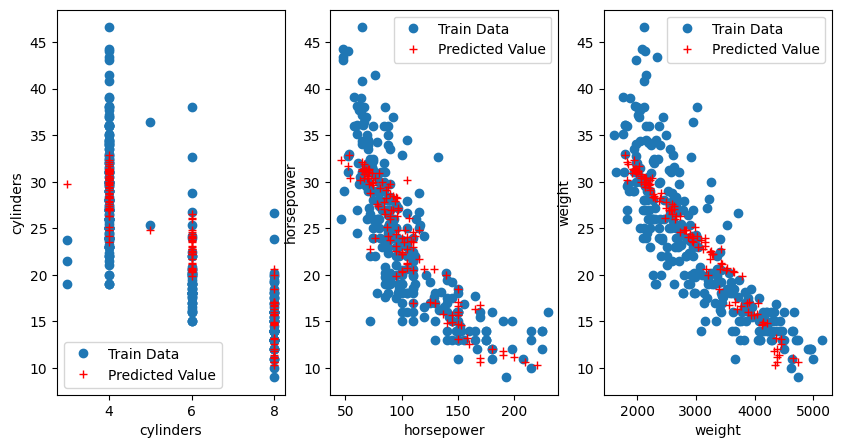

In [11]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = lr.predict(X_test)

fig, axes = plt.subplots(1,3,figsize=(10,5))

for i, col in enumerate(X_test.columns):
  axes[i].plot(X_train[col],y_train,'o',label='Train Data')
  axes[i].plot(X_test[col],y_hat_test,'r+',label='Predicted Value')

  axes[i].set_xlabel(col)
  axes[i].set_ylabel(col)
  axes[i].legend(loc='best')

plt.show()